# Question 2 - Supplementary notebook

### This is a supplementary notebook for Question 2. 
### It is your responsibility to check the correctness of the inputs of the model, i.e. you must perform basic verifications.

# ----

***Double click on this cell to ensure that you can edit it.***
 
# Name and Surname: XXXX INSERT NAME AND SURNAMEXXX

# Student number: XXX INSERT STUDENT NUMBER XXX


In [1]:
try: 
    import engmod.structfem as sfem
except:
    print("*"*100)
    print("You must ensure that the engmod folder is the same directory as the jupyter notebook file")
    print("*"*100)    
    raise ValueError("You have to fix this")

import numpy as np
import scipy.optimize as sciopt
import scipy.linalg as slin
import matplotlib.pyplot as plt 
import random


print("Successfully imported all modules")

Successfully imported all modules


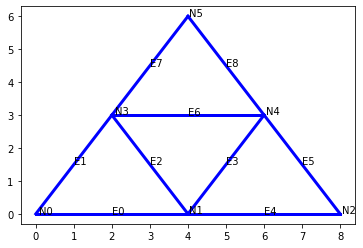

In [2]:
# =======================================================================================
# Define node coordinates
# =======================================================================================
node_coordinates  = np.array([[0,0], # Node 0
                              [4,0], # Node 1
                              [8,0], # Node 2
                              [2,3], # Node 3
                              [6,3], # Node 4
                              [4,6], # Node 5
                              ]) 
# =======================================================================================
# Define elements from nodes
# =======================================================================================
elem_connectivity  = np.array([[0,1], # Element 0
                               [0,3], # Element 1
                               [1,3], # Element 2
                               [1,4], # Element 3
                               [1,2], # Element 4
                               [2,4], # Element 5
                               [3,4], # Element 6
                               [3,5], # Element 7
                               [4,5], # Element 8
                                    ])

# =======================================================================================
# Prescribed displacements
# =======================================================================================
prescribed_displacement  = np.array([[0,1,0],
                                     [1,1,0],
                                     [1,0,0],
                                     [2,1,0],
                                            ])

# =======================================================================================
# Prescribed forces/loads
# =======================================================================================

prescribed_force = np.array([[4,0,5000],
                             [4,1,0],
                             [5,0,5000],
                             [5,1,0],
                            ])

# =======================================================================================
# Element properties
# =======================================================================================

E   = 73.1E9 # Pa
b = 0.030    # m
h = 0.040    # m
A   = b * h  # m^2

rho = 2710   # kg/m^3

elem_E = np.array([E,E,E,E,E,E,E,E,E])           # Young's modulus properties 
elem_A = np.array([A,A,A,A,A,A,A,A,A])           # Area properties
elem_rho = rho * np.ones(9)                      # Density properties

elemprop = {"A": elem_A,
            "E": elem_E,
            "density": elem_rho}

# =======================================================================================
# Define the truss structure
# =======================================================================================

tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements

tmn.solve()
tmn.plot_system(show_element_numbers=True,show_node_numbers=True,show_displacement=False,magnification=1)

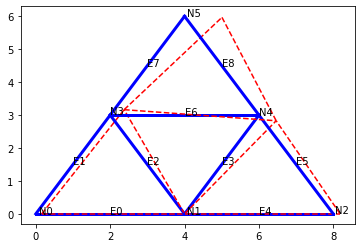

In [3]:
tmn.plot_system(show_element_numbers=True,
                show_node_numbers=True,
                show_displacement=True,
                magnification=1000)

In [4]:
print('Node Loads:[n0x,n0y,x1x,n1y....]')
print(tmn.solution_dict["loads"][0])

Node Loads:[n0x,n0y,x1x,n1y....]
0.0


In [5]:
print('Node displacements:[n0x,n0y,x1x,n1y....]')
print(tmn.solution_dict["displacements"][6])

Node displacements:[n0x,n0y,x1x,n1y....]
0.00037532942356470483


In [6]:
print('Element stresses:[e0,e0,e1,e1....]')
sigmas = tmn.post_stress_strain()["stress"]
maxsigma = max(abs(tmn.post_stress_strain()["stress"]))
print(maxsigma)
for idx,i in enumerate(sigmas):
    if abs(i) == maxsigma:
        print(idx)
print(tmn.post_stress_strain()["stress"])

Element stresses:[e0,e0,e1,e1....]
6057623.947024474
5
[-2889834.80792688  5209723.78880049 -1453941.21019217  2301841.36841615
  3360165.19207312 -6057623.94702447  1613002.94918709  3755782.57860832
 -3755782.57860832]


In [7]:
SF = 414E6/maxsigma
print(SF)

68.34362839630516


In [8]:
print('Element loads:[e0,e0,e1,e1....]')
loadscom = tmn.solution_dict["loads"]
minload = min(loadscom)
print(minload)
for idx,i in enumerate(loadscom):
    if i == minload:
        print(idx)
print(loadscom)

Element loads:[e0,e0,e1,e1....]
-9999.999999999998
2
[     0.          -5201.70265427 -10000.           -846.59469146
      0.           6048.29734573      0.              0.
   5000.              0.           5000.              0.        ]


In [9]:
lengte2 = ((4-2)**2+(0-3)**2)**0.5
print(lengte2)

3.605551275463989


In [10]:
# =======================================================================================
# Define node coordinates
# =======================================================================================
node_coordinates  = np.array([[0,0], # Node 0
                              [4,0], # Node 1
                              [8,0], # Node 2
                              [2,3], # Node 3
                              [6,3], # Node 4
                              [4,6], # Node 5
                              ]) 
# =======================================================================================
# Define elements from nodes
# =======================================================================================
elem_connectivity  = np.array([[0,1], # Element 0
                               [0,3], # Element 1
                               [1,3], # Element 2
                               [1,4], # Element 3
                               [1,2], # Element 4
                               [2,4], # Element 5
                               [3,4], # Element 6
                               [3,5], # Element 7
                               [4,5], # Element 8
                                    ])

# =======================================================================================
# Prescribed displacements
# =======================================================================================
prescribed_displacement  = np.array([[0,1,0],
                                     [1,1,0],
                                     [1,0,0],
                                     [2,1,0],
                                            ])

# =======================================================================================
# Prescribed forces/loads
# =======================================================================================

prescribed_force = np.array([[4,0,5000],
                             [4,1,0],
                             [5,0,5000],
                             [5,1,0],
                            ])

# =======================================================================================
# Element properties
# =======================================================================================

E   = 73.1E9 # Pa
b = 0.030    # m
h = 0.040    # m
A   = b * h  # m^2

rho = 2710   # kg/m^3

elem_E = np.array([E,E,E,E,E,E,E,E,E])           # Young's modulus properties 
elem_A = np.array([A,A,A,A,A,A,A,A,A])           # Area properties
elem_rho = rho * np.ones(9)                      # Density properties

elemprop = {"A": elem_A,
            "E": elem_E,
            "density": elem_rho}

# =======================================================================================
# Define the truss structure
# =======================================================================================

tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements


In [11]:
def inverseMaxStress(unknowsn):
    theta = unknowsn[0]
    #print(theta)
    
    prescribed_force = np.array([[4,0,5000*np.sin(theta)],
                             [4,1,5000*np.cos(theta)],
                             [5,0,5000*np.sin(theta)],
                             [5,1,5000*np.cos(theta)],
                            ])
    
    tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements
    tmn.solve()
    maxstress = (max(abs(tmn.post_stress_strain()["stress"])))
    #print(100000000/maxstress)
    return 100000000/maxstress


In [12]:
bnd = [0,np.pi]
bounds=[bnd]
SolutionInitCon = ([0])

In [13]:
myoptions={'disp':True,'maxiter': 100}#, 'ftol':0.1}
solution = sciopt.minimize(inverseMaxStress ,SolutionInitCon ,bounds=bounds, method='SLSQP',options = myoptions )

Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.0302402747731
            Iterations: 5
            Function evaluations: 12
            Gradient evaluations: 5


In [14]:
print(solution.x)

[2.12569186]


worst angel 2.1257987019320983
worst angel 2.125798680431579
worst angel 2.1257987011012784
worst angel 2.1257987082094543


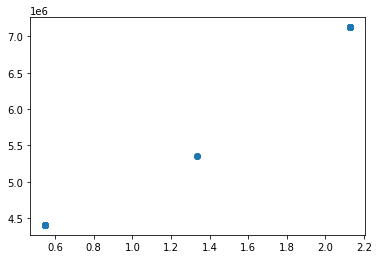

In [15]:
thetas = []
maxstress = []
myoptions={'disp':False,'maxiter': 100}
for i in range(100):
    SolutionInitCon = ([random.uniform(0, np.pi)])
    solution = sciopt.minimize(inverseMaxStress ,SolutionInitCon ,bounds=bounds, method='SLSQP',options = myoptions )
    thetas.append(solution.x[0])
    
    prescribed_force = np.array([[4,0,5000*np.sin(solution.x[0])],
                             [4,1,5000*np.cos(solution.x[0])],
                             [5,0,5000*np.sin(solution.x[0])],
                             [5,1,5000*np.cos(solution.x[0])],
                            ])
    
    tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements
    tmn.solve()
    
    maxstress.append((max(abs(tmn.post_stress_strain()["stress"]))))

maxxs = max(maxstress)
for idx,i in enumerate(maxstress):
    if abs(i)== maxxs:
        print('worst angel',thetas[idx])
    

plt.figure()
plt.scatter(thetas,maxstress)
plt.show()